<a href="https://colab.research.google.com/github/fpabi/Tareas/blob/main/Tarea_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 12
###Fabiana Pavón
####Prof: Lazaro Bustio
####Objetivo: Entender el análisis exploratorio


In [6]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables df.shape
import io
from google.colab import files

In [7]:
uploaded = files.upload()

Saving vehicles.csv to vehicles.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded["vehicles.csv"]))

In [9]:
df.shape

(426880, 26)

In [10]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [12]:
 df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [14]:
df.nunique(axis=0)


id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [15]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,426880.000000,426880.000000,425675.000000,422480.000000,0.000000,420331.000000,420331.000000
mean,7311486634.224333,75199.033187,2011.235191,98043.331443,nan,38.493940,-94.748599
std,4473170.412559,12182282.173598,9.452120,213881.500798,nan,5.841533,18.365462
min,7207408119.000000,0.000000,1900.000000,0.000000,nan,-84.122245,-159.827728
25%,7308143339.250000,5900.000000,2008.000000,37704.000000,nan,34.601900,-111.939847
50%,7312620821.000000,13950.000000,2013.000000,85548.000000,nan,39.150100,-88.432600
75%,7315253543.500000,26485.750000,2017.000000,133542.500000,nan,42.398900,-80.832039
max,7317101084.000000,3736928711.000000,2022.000000,10000000.000000,nan,82.390818,173.885502


In [16]:
df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [20]:
# Reclassify condition column
def clean_condition(row):
  good = ['good','fair']
  excellent = ['excellent','like new']

  if row.condition in good:
    return 'good'
  if row.condition in excellent:
    return 'excellent'
  return row.condition# Clean dataframe
def clean_df(playlist):
  df_cleaned = df.copy()
  df_cleaned['condition'] = df_cleaned.apply(lambda row:clean_condition(row), axis=1)
  return df_cleaned# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)
print(df_cleaned.condition.unique())


[nan 'good' 'excellent' 'new' 'salvage']


In [22]:
df_cleaned = df_cleaned.copy().drop(['url','image_url','region_url'], axis=1)

In [27]:

NA_val = df_cleaned.isna().sum()

def na_filter(na, threshold=0.4):
    col_pass = []
    for i in na.keys():
        if na[i] / df_cleaned.shape[0] < threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df_cleaned[na_filter(NA_val)]

print(df_cleaned.columns)


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')


In [29]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,364076.000000,364076.000000,364076.000000,364076.000000,360715.000000,360715.000000
mean,7311452510.716609,19435.218990,2012.309262,94376.099759,38.516665,-94.138671
std,4391458.441977,14248.973882,5.747604,66759.644660,5.849388,18.048492
min,7301583321.000000,1000.000000,1991.000000,0.000000,-84.122245,-159.719900
25%,7308050685.750000,7995.000000,2009.000000,39082.000000,34.724400,-110.170000
50%,7312519079.500000,15995.000000,2013.000000,88942.000000,39.254962,-87.871739
75%,7315227796.500000,27991.000000,2017.000000,137000.000000,42.356988,-80.759936
max,7317101084.000000,99999.000000,2022.000000,898163.000000,82.252826,167.629911


In [30]:
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(120453, 19)

<ipython-input-31-025f21845758>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr()# plot the heatmap


<Axes: >

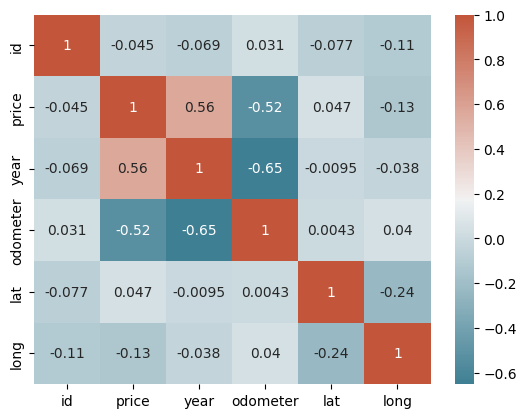

In [31]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))